In [50]:
import requests
from bs4 import BeautifulSoup, element
import numpy as np 
import pandas as pd 
import re, itertools
import matplotlib.pyplot as plt
import wordcloud as wc

In [3]:
pages = pd.read_csv("tandf.csv")
pages = pages['pages'].tolist()
articles = pd.DataFrame(columns = ['keywords', 'title', 'authors', 'published'])

ctr = 0

for page in pages:

    prefix = re.search('https://.*com', page).group(0)
    
    page = requests.get(page)
    soup = BeautifulSoup(page.content, "lxml")
    keywords = soup.find("div", class_ = "hlFld-KeywordText")
    keywords = keywords.find_all("a")
    keywords = ', '.join([k.text.strip() for k in keywords])

    cit_ref = soup.find('li', class_ = 'downloadCitations').find('a')['href']
    cit_page = requests.get(prefix + cit_ref)
    cit_soup = BeautifulSoup(cit_page.content, 'lxml')
    citation = cit_soup.find('div', class_ = 'pub-meta').text.replace('\n', ' ').strip()

    authors = citation.split('(')[0].replace(' &', ',')
    date = re.search('(\d{4})', citation).group(0)
    title = re.search('\)[^,]*', citation).group(0)[2:]

    articles = articles.append({'authors': authors,
                                'title': title,
                                'published': date,
                                'keywords': keywords}, ignore_index=True)

display(articles)

,keywords,title,authors,published
0,"Donald Trump, sexism, voting, 2016 election, A...",Just Locker Room Talk? Explicit Sexism and the...,"Jesse H. Rhodes, Elizabeth A. Sharrow, Jill S....",2020
1,"political incivility, simplistic argumentation...",Uncivil Communication and Simplistic Argumenta...,"Ine Goovaerts, Sofie Marien",2020
2,"affective polarization, intergroup contact, in...",Can Interparty Contact Reduce Affective Polari...,"Magdalena Wojcieszak, Benjamin R. Warner",2020
3,"issue ownership, political parties, position, ...",Negatively Affecting Voters’ Issue Considerati...,"Jonas Lefevere, Henrik Bech Seeberg, Stefaan W...",2020
4,"citizens’ political talk, deliberative democra...",From the Living Room to the Meeting Hall? Citi...,"Rüdiger Schmitt-Beck, Christiane Grill",2020
...,...,...,...,...
251,"Mobile news, social media news, news effects, ...",Mobile but Not Mobilized? Differential Gains f...,Jakob Ohme,2020
252,"Journalism, social media, WhatsApp, content an...",What’s New about Whatsapp for News? A Mixed-Me...,"Karin Boczek, Lars Koppers",2020
253,"Mobile technology, mobilities, mobile journali...",Making the 21st Century Mobile Journalist: Exa...,"Matthew N. Bui, Rachel E. Moran",2020
254,"Mobile, smartphone, news, production, consumpt...",Understanding Mobile News: Looking beyond the ...,"Leopoldina Fortunati, John O’Sullivan",2020


In [15]:
pages = pd.read_csv("sage.csv")
pages = pages['pages'].tolist()
articles2 = pd.DataFrame(columns = ['keywords', 'title', 'authors', 'published'])

for page in pages:

    print(page)

    prefix = re.search('https://.*com', page).group(0)
    
    page = requests.get(page)
    soup = BeautifulSoup(page.content, "lxml")
    keywords = soup.find("div", class_ = "hlFld-KeywordText")
    keywords = keywords.find_all("a")
    keywords = ', '.join([k.text.strip() for k in keywords])

    title = soup.find('h1').text.replace('\n', ' ').strip()
    author = soup.find('div', 'hlFld-ContribAuthor').find_all('span', 'contribDegrees')
    author = ', '.join([a.find('a').text.strip() for a in author])
    date = re.search('\d{4}', soup.find('div', 'published-dates').text.split(':')[-1].strip()).group(0)

    articles2 = articles2.append({'authors': author,
                                'title': title,
                                'published': date,
                                'keywords': keywords}, ignore_index=True)

display(articles2)

https://journals.sagepub.com/doi/abs/10.1177/1464884919883489
https://journals.sagepub.com/doi/abs/10.1177/1464884919883490
https://journals.sagepub.com/doi/abs/10.1177/1464884919883491
https://journals.sagepub.com/doi/abs/10.1177/1464884919883492
https://journals.sagepub.com/doi/abs/10.1177/1464884919880060
https://journals.sagepub.com/doi/abs/10.1177/1464884917753785
https://journals.sagepub.com/doi/abs/10.1177/1464884918754851
https://journals.sagepub.com/doi/abs/10.1177/1464884918755638
https://journals.sagepub.com/doi/abs/10.1177/1464884918754829
https://journals.sagepub.com/doi/abs/10.1177/1464884918761629
https://journals.sagepub.com/doi/abs/10.1177/1464884918754849
https://journals.sagepub.com/doi/abs/10.1177/1464884918763503
https://journals.sagepub.com/doi/abs/10.1177/1464884917716503
https://journals.sagepub.com/doi/abs/10.1177/1464884918802525
https://journals.sagepub.com/doi/abs/10.1177/1464884918797613
https://journals.sagepub.com/doi/abs/10.1177/1464884917716818
https://

,keywords,title,authors,published
0,"Bourdieu, Habermas, news agencies, submarine c...","Oligopolies of the past? Habermas, Bourdieu, a...",Heidi J. S. Tworek,2020
1,"Digital technologies, international, national,...",Between the state and the market: An analysis ...,"Elena Vartanova, Andrei Vyrkovsky",2020
2,"AFP, dpa, EFE, international news agency, nati...","AFP, EFE and dpa as international news agencies",Jasmin Surm,2020
3,"Austria Presse Agentur, digital disruption, dy...",How do media-owned national news agencies surv...,"Atte Jääskeläinen, Servet Yanatma",2020
4,"Autonomy, discursive institutionalism, elite i...","Abnegation, accommodation and affirmation: Thr...","Terhi Rantanen, Anthony Kelly",2020
...,...,...,...,...
314,"Appearance comparison, body appreciation, body...",Social media is not real: The effect of ‘Insta...,"Marika Tiggemann, Isabella Anderberg",2020
315,"Archives, blockchain, decentralization, discou...",Blockchain archival discourse: Trust and the i...,"Angela Woodall, Sharon Ringel",2020
316,"4chan, alt-right, antagonistic speech, anti-Se...",(((They))) rule: Memetic antagonism and nebulo...,"Marc Tuters, Sal Hagen",2020
317,"Authoritarian regime, China, information and c...",The commercialisation of Internet-opinion mana...,Rui Hou,2020


In [16]:
articles = articles.append(articles2)

In [17]:
len(articles)

575

In [18]:
articles.to_csv('keywords.csv')

In [3]:
articles = pd.read_csv('keywords.csv')

In [68]:
keywords = articles['keywords'].tolist()
keywords = [k.split(', ') for k in keywords]
keywords = list(itertools.chain.from_iterable(keywords))
keywords = pd.Series(keywords)
print('total keywords: ' + str(len(keywords)))
vc = keywords.value_counts()
print('unique keywords: ' + str(len(vc)))
vc = vc[vc > 9]
print('unique keywords with >=10 instances: ' + str(len(vc)))
vc

total keywords: 3540
unique keywords: 2264
unique keywords with >=10 instances: 24


social media               90
journalism                 56
Twitter                    28
content analysis           24
online news                19
news                       19
Facebook                   18
journalism studies         15
disinformation             14
political communication    13
Journalism                 13
Instagram                  13
digital journalism         12
news consumption           12
fake news                  12
epistemology               11
public opinion             11
Digital journalism         11
newspapers                 11
populism                   11
online journalism          10
news values                10
journalists                10
democracy                  10
dtype: int64

In [69]:
keywords = [k.replace(' ', '').replace('-', '') for k in keywords.tolist()]
print(keywords)
wordcloud = wc.WordCloud(width = 800, height = 800).generate(' '.join(keywords) + ' ')

['DonaldTrump', 'sexism', 'voting', '2016election', 'AccessHollywoodTape', 'politicalincivility', 'simplisticargumentation', 'experimentaldesign', 'politicaltrust', 'persuasion', 'affectivepolarization', 'intergroupcontact', 'intergrouphostility', 'partisanship', 'partisans', 'issueownership', 'politicalparties', 'position', 'competence', 'commitment', 'negativecampaigning', 'citizens’politicaltalk', 'deliberativedemocracy', 'deliberativesystem', 'publicsphere', 'socialnetworks', 'partisanmedia', 'reinforcingspirals', 'mediaeffects', 'refugees', 'immigration', 'publicopinion', 'media', 'populistcommunication', 'cognitivepriming', 'affectivepriming', 'stereotypes', 'comparativeresearch', 'experiment', 'right-wingpopulism', 'Muslims', 'experiment', 'perceiveddiscrimination', 'collectiveaction', 'long-termeffects', 'politicaltalk', 'listening', 'deliberation', 'dialogue', 'intergroupcommunication', 'imaginedinteractions', 'intergroupcontacttheory', 'politicalsophistication', 'politicalmis

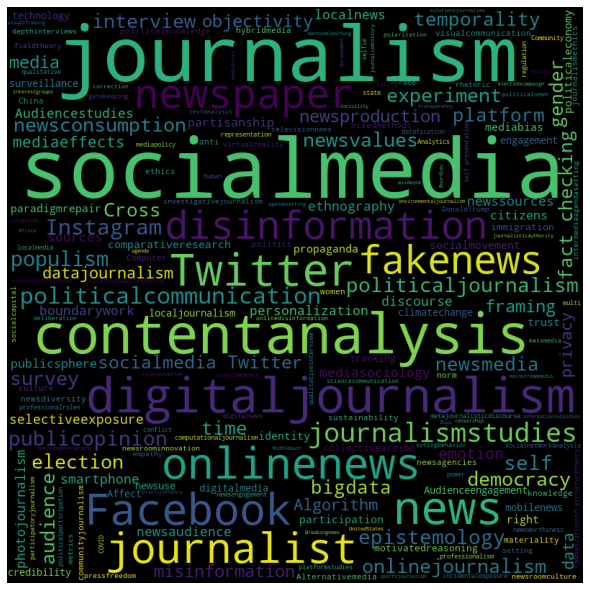

In [70]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 